In [1]:
import numpy as np
import PIL
import matplotlib.pyplot as plt
import pandas as pd
import os
import copy


import scipy.io

In [3]:
things_stim_path = '/user_data/mmhender/things/'
filename = os.path.join(things_stim_path,'things_concepts.tsv')

df = pd.read_csv(filename, sep='\t')
concept_list = np.array(df['Word'])
concept_list = [c.replace(' ', '_') for c in concept_list]
n_concepts = len(concept_list)
# concepts are the fine-grained/basic level names

folder = os.path.join(things_stim_path, '27 higher-level categories')

category_names = scipy.io.loadmat(os.path.join(folder, 'categories.mat'))['categories'][0]
category_names = [category_names[ii][0] for ii in range(len(category_names))]
category_names = [categ.replace(' ', '_') for categ in category_names]
n_categ = len(category_names)
# categories are the high-level/superordinate names

# load the "bottom-up" (human-generated) groupings
dat = scipy.io.loadmat(os.path.join(folder, 'category_mat_bottom_up.mat'))
cmat = dat['category_mat_bottom_up']

concepts_each_categ = [np.array(concept_list)[cmat[:,ii]==1] for ii in range(n_categ)]

cmat_adjusted = copy.deepcopy(cmat).astype(bool) 

# deciding how to resolve overlap between categories. 
# set these as categories to "prioritize" when the same concept occurs in 
# another category. 
categories_prioritize = ['bird','insect','dessert','fruit','vegetable']

for cc1 in range(n_categ):
    
    for cc2 in np.arange(cc1+1, n_categ):
        
        overlap = cmat_adjusted[:,cc1] & cmat_adjusted[:,cc2]

        cat1 = category_names[cc1]
        cat2 = category_names[cc2]
        
        if np.sum(overlap)>0:
            
            if (cat1 in categories_prioritize) and (cat2 not in categories_prioritize):
                # remove concept from the not-prioritized category
                cmat_adjusted[overlap,cc2] = False
            elif (cat2 in categories_prioritize) and (cat1 not in categories_prioritize):
                cmat_adjusted[overlap,cc1] = False        
            else:
                # if neither is prioritized, don't use the concept at all
                cmat_adjusted[overlap,cc1] = False
                cmat_adjusted[overlap,cc2] = False
                
concepts_each_categ_adj = [np.array(concept_list)[cmat_adjusted[:,ii]==1] for ii in range(n_categ)]

# now choose same number of concepts from each category
n_each = [len(conc) for conc in concepts_each_categ_adj]
n_concepts_each = np.min(n_each)

# always using same seed so we get same result
np.random.seed(243545)

for cat in range(n_categ):
    print(category_names[cat])
    conc = concepts_each_categ_adj[cat]
    conc_use = np.random.choice(conc, n_concepts_each, replace=False)
    print(conc_use)

animal
['alligator' 'seal' 'chinchilla' 'lion' 'raccoon' 'weasel' 'platypus'
 'badger' 'turtle' 'squirrel' 'cougar' 'mongoose' 'cow' 'cat']
bird
['rooster' 'penguin' 'chicken' 'flamingo' 'toucan' 'turkey' 'cockatoo'
 'pelican' 'duckling' 'duck' 'ostrich' 'owl' 'pigeon' 'vulture']
body_part
['elbow' 'knee' 'skull' 'foot' 'bone' 'eye' 'tongue' 'navel' 'wrist'
 'finger' 'hair' 'hip' 'chin' 'arm']
clothing
['outfit' 'hood' 'pants' 'jacket' 'cloak' 'coverall' 'shawl' 'bathrobe'
 'chaps' 'hoodie' 'leggings' 'cape' 'underwear' 'tuxedo']
clothing_accessory
['bandanna' 'hat' 'cufflink' 'headdress' 'purse' 'headscarf' 'button'
 'scarf' 'belt_buckle' 'top_hat' 'garter' 'boa' 'tie' 'muff']
container
['flask' 'crate' 'cup' 'hatbox' 'thermos' 'bin' 'can' 'bucket'
 'shopping_basket' 'urn' 'oilcan' 'tupperware' 'honeypot' 'mailbox']
dessert
['brownie' 'pie' 'ice_cube' 'chocolate' 'baklava' 'shortbread' 'donut'
 'parfait' 'cheesecake' 'fruitcake' 'pastry' 'flan' 'wedding_cake'
 'mousse']
drink
['tea' '

In [9]:
concepts_each_categ_adj = [np.array(concept_list)[cmat_adjusted[:,ii]==1] for ii in range(n_categ)]

In [10]:
neach = [len(conc) for conc in concepts_each_categ_adj]
np.min(neach)

14

In [13]:
for cat in range(n_categ):
    # print(category_names[cat])
    conc = concepts_each_categ_adj[cat]
    # print(conc)
    has_str_overlap = [np.where([conc[ii1] in conc[ii2]  for ii2 in range(len(conc))]) \
                         for ii1 in range(len(conc))]
    has_str_overlap = [np.array(over[0]) if len(over[0])>0 else np.nan for over in has_str_overlap]
    has_str_overlap = [over[over!=ii] for ii, over in enumerate(has_str_overlap)]
    any_over = [len(over)>0 for over in has_str_overlap]

    
    # print(conc[any_over])
    # print(conc)

In [14]:
has_str_overlap = [np.where([conc[ii1] in conc[ii2]  for ii2 in range(len(conc))]) \
                         for ii1 in range(len(conc))]
has_str_overlap = [np.array(over[0]) if len(over[0])>0 else np.nan for over in has_str_overlap]
has_str_overlap = [over[over!=ii] for ii, over in enumerate(has_str_overlap)]
any_over = [len(over)>0 for over in has_str_overlap]

print(conc[any_over])

['bow' 'cannon' 'gun']


In [100]:
conc[any_over]

array(['bow', 'cannon', 'gun'], dtype='<U18')

In [98]:
has_str_overlap

[array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([10]),
 array([], dtype=int64),
 array([8]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([ 3, 17]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64)]

In [62]:
n_concepts_each = 4;

In [ ]:
has_overlap = np.sum(cmat, axis=1)>1
no_categ = np.sum(cmat, axis=1)<1
has_one_categ = ~has_overlap & ~no_categ
print(np.sum(has_overlap), np.sum(no_categ), np.sum(has_one_categ))
concepts_use = [concept_list[ii] for ii in np.where(has_one_categ)[0]]

34 928 892


In [32]:
# exclude = ['animal','food']
exclude=[]

concept_has_overlap = np.zeros((n_concepts,),dtype=bool)

for cc1 in range(n_categ):
    
    for cc2 in np.arange(cc1+1, n_categ):
        
        if (category_names[cc1] in exclude) or (category_names[cc2] in exclude):
            continue
        conc1 = concepts_each_categ[cc1]
        conc2 = concepts_each_categ[cc2]
        
        overlap = np.intersect1d(conc1, conc2)
        
        if len(overlap)>0:
            print(conc1, '&', conc2)
            print(overlap)
            
            inds = np.where([conc==])

animal & bird
['chick' 'chicken' 'duck' 'ostrich' 'penguin']
animal & body_part
['calf']
animal & insect
['scorpion']
animal & sports_equipment
['bat']
body_part & furniture
['chest']
clothing & clothing_accessory
['bowtie' 'cummerbund']
dessert & drink
['milkshake']
dessert & food
['baklava' 'birthday_cake' 'ice' 'ice_cube' 'pastry' 'pie' 'shortbread'
 'souffle']
drink & office_supply
['punch']
food & fruit
['avocado']
food & plant
['seed']
food & vegetable
['chive' 'garlic' 'onion' 'sprouts']
fruit & vegetable
['tomato']
furniture & home_decor
['coat_rack']
kitchen_appliance & kitchen_tool
['juicer' 'kettle']
kitchen_tool & tool
['funnel' 'icepick']
kitchen_tool & vegetable
['pepper']
office_supply & tool
['file' 'letter_opener']
sports_equipment & tool
['bungee']
sports_equipment & toy
['frisbee']
sports_equipment & weapon
['baton']
tool & weapon
['trident']
toy & vehicle
['scooter']
toy & weapon
['boomerang']


In [33]:
for cat in range(n_categ):
    
    print(category_names[cat])
    print(concepts_each_categ[cat])

animal
['aardvark' 'alligator' 'alpaca' 'anteater' 'antelope' 'badger' 'bat'
 'bear' 'beaver' 'bird' 'bison' 'boar' 'bull' 'calf' 'camel' 'cat'
 'cheetah' 'chick' 'chicken' 'chinchilla' 'chipmunk' 'cougar' 'cow'
 'coyote' 'deer' 'dog' 'donkey' 'duck' 'elephant' 'ferret' 'fox' 'gazelle'
 'giraffe' 'goat' 'gopher' 'gorilla' 'groundhog' 'guinea_pig' 'hamster'
 'hedgehog' 'hippopotamus' 'horse' 'hyena' 'jellyfish' 'kangaroo' 'kitten'
 'koala' 'lamb' 'leech' 'leopard' 'lion' 'llama' 'meerkat' 'mole'
 'mongoose' 'monkey' 'moose' 'mouse' 'orangutan' 'ostrich' 'otter' 'panda'
 'panther' 'penguin' 'pig' 'piglet' 'platypus' 'polar_bear' 'pony'
 'porcupine' 'possum' 'puppy' 'rabbit' 'raccoon' 'racehorse' 'ram'
 'reindeer' 'rhinoceros' 'scorpion' 'seal' 'shark' 'sheep' 'skunk' 'sloth'
 'slug' 'snail' 'squirrel' 'tiger' 'turtle' 'walrus' 'warthog' 'weasel'
 'wolf' 'yak' 'zebra']
bird
['cardinal' 'chick' 'chicken' 'cockatoo' 'crow' 'duck' 'duckling' 'eagle'
 'flamingo' 'goose' 'hawk' 'hummingbird' '

In [30]:
np.sum(cmat, axis=0)

array([ 95,  27,  31,  60,  21,  28,  29,  15,  16, 137,  32,  27,  19,
        20,  21,  27,  18,  33,  26,  28,  21,  46,  51,  29,  38,  37,
        28], dtype=uint64)

In [45]:
things_images_root = '/user_data/mmhender/things/THINGS_smaller/Images/'

In [67]:
cc = 40;  
categ = categ_list[cc]
folder = os.path.join(things_images_root, categ)
files = os.listdir(folder)
print(len(files))
    

13


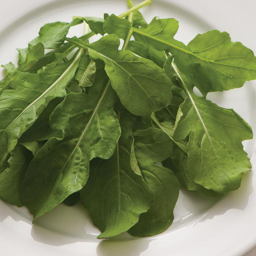

In [68]:
im = PIL.Image.open(os.path.join(folder, files[2]))

im = im.resize([256,256])

im

In [ ]:
files[2].split('.jpg')[0]